In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii
import matplotlib.ticker as ticker

from scipy import stats

SAGA_DIR = os.environ['SAGA_DIR']


In [2]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.0
    plt.rcParams['font.size'] = 15.0
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

In [3]:
# NAMED HOSTS
complete_hosts =[147100,166313,165536,61945,132339, 149781,33446]#150887]
# 150887 has bias

In [4]:
n=0
for host in complete_hosts:

    # READ BASE CATALOG
    basefile  = os.path.join(SAGA_DIR, 'base_catalogs', 'base_sql_nsa{0}.fits.gz'.format(host))
    base = Table.read(basefile) 
    
    # FIND GOOD OBJECTS IN BASE CATALOG
    m_rmv  = base['REMOVE'] == -1
    m_rvir = base['RHOST_KPC'] <= 300
    m_fib  = base['FIBERMAG_R'] <= 23
    m_gal  = base['PHOT_SG'] == 'GALAXY'

    base = base[m_rmv & m_rvir & m_fib & m_gal]
        
    if n == 0:
        alldata = base
    else:
        alldata = table.vstack([alldata,base])
    n=1

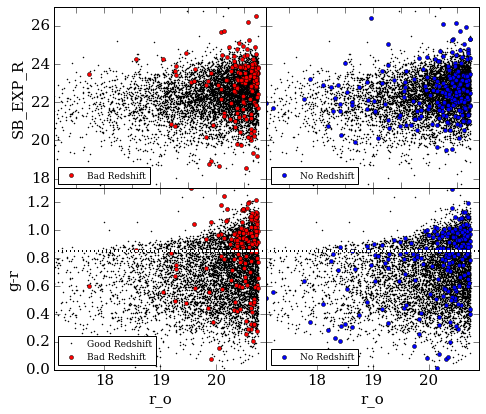

In [5]:
base = alldata
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)#,sharex=True,sharey=True)



# WHICH PASS GRI CUTS
gmag = base['g'] - base['EXTINCTION_G']
rmag = base['r'] - base['EXTINCTION_R']
imag = base['i'] - base['EXTINCTION_I']

gr = gmag - rmag
ri = rmag - imag

grerr = np.sqrt(base['g_err']**2 + base['r_err']**2)
rierr = np.sqrt(base['r_err']**2 + base['i_err']**2)

cgmr = gr - 2.*grerr
crmi = ri - 2.*rierr

m_r    = base['r'] - base['EXTINCTION_R'] <= 20.75
msk1 = cgmr < 0.85 
msk2 = crmi < 0.55


# DEFINE THE GOOD, BAD AND UGLY
gribase = base[msk1 & msk2 & m_r]

zgood = gribase['ZQUALITY']  >= 3
zbad = (gribase['ZQUALITY']  < 3) & (gribase['ZQUALITY']  != -1)
znot = gribase['ZQUALITY']  == -1


r = gribase['r'] - gribase['EXTINCTION_R']
g = gribase['g'] - gribase['EXTINCTION_G']
gr = g - r


ax1.plot(r[zgood],gribase['SB_EXP_R'][zgood],'ko',ms=1,label='_nolegend',zorder=1)
ax1.plot(r[zbad],gribase['SB_EXP_R'][zbad],'ro',ms=4,label='Bad Redshift',zorder=2)
ax2.plot(r[zgood],gribase['SB_EXP_R'][zgood],'ko',ms=1,label='_nolegend_',zorder=1)
ax2.plot(r[znot],gribase['SB_EXP_R'][znot],'bo',ms=4,label='No Redshift',zorder=2)
ax3.plot(r[zgood],gr[zgood],'ko',ms=1,label='Good Redshift',zorder=2)
ax3.plot(r[zbad],gr[zbad],'ro',ms=4,label='Bad Redshift',zorder=2)
ax4.plot(r[zgood],gr[zgood],'ko',ms=1,label='_nolegend_',zorder=1)
ax4.plot(r[znot],gr[znot],'bo',ms=4,label='No Redshift',zorder=1)



mlim = 20.9        
ax1.set_xlim(17.1,mlim)
ax1.set_ylim(17.5,27)
ax2.set_xlim(17.1,mlim)
ax2.set_ylim(17.5,27)    
xl = [-0.3,1.7]
yl=[-0.55,1.1]
ax3.set_ylim(0,1.3)
ax3.set_xlim(17.1,mlim)
ax4.set_ylim(0,1.3)
ax4.set_xlim(17.1,mlim)

ax1.get_xaxis().set_ticklabels([])
ax2.get_xaxis().set_ticklabels([])
ax2.get_yaxis().set_ticklabels([])
ax4.get_yaxis().set_ticklabels([])
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))

# LINE INDICATING GR CRITERIA
tgr=0.85    
ax3.axhline(tgr, c='w')
ax3.axhline(tgr, c='k', ls=':')
ax4.axhline(tgr, c='w')
ax4.axhline(tgr, c='k', ls=':')

# LEGENDS
ax1.legend(loc=3,fontsize=9,frameon=True,numpoints = 1)
ax2.legend(loc=3,fontsize=9,frameon=True,numpoints = 1)
ax3.legend(loc=3,fontsize=9,frameon=True,numpoints = 1)
ax4.legend(loc=3,fontsize=9,frameon=True,numpoints = 1)

# X/Y TITLES
ax1.set_ylabel('SB_EXP_R')
ax3.set_ylabel('g-r')
ax3.set_xlabel('r_o')
ax4.set_xlabel('r_o')


#print nall,nbad,nnot

plt.tight_layout(w_pad=0,h_pad=0)
plt.savefig('fig_spec_complete1.png')



In [6]:
m = gr > 1.2
for obj in gribase[m]:
    print obj['ZQUALITY'],obj['RA'],obj['DEC']

1 248.115825921 19.8299650421
3 248.104747393 19.3651460525
4 248.301318154 19.8489304545
3 234.325873352 16.7594685034
3 233.858425052 16.2141530694
3 234.435960893 16.5933516313
4 354.341279085 0.114771996855
-1 353.73947361 0.389640537593
-1 353.995940343 0.422725931919
2 353.95316085 0.342462149508
1 353.961531446 0.345279405166
3 353.94636117 0.380188628021
3 353.805870993 0.17915963988
2 39.254585762 -1.3337251497
1 336.313164965 -3.41816217748
1 336.006377514 -3.42790486398
1 335.509494633 -3.57712303563
1 336.261343959 -3.6494946462
-1 336.21215169 -3.53094145243
1 335.786072196 -3.5476566353
-1 123.290881182 36.2456215891
3 123.66458031 36.0510911321
-1 123.528276197 36.5829995167
4 123.272077307 36.1267582887
-1 123.279286477 36.1059066433
3 122.776884677 36.3543992399
-1 123.445379884 36.3004508503
-1 122.715274563 36.3567450954
-1 122.78361092 36.4990724732
-1 122.69934657 36.2689687378


/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: divide by zero encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:44: RuntimeWarning: divide by zero encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:44: RuntimeWarning: invalid value encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:58: RuntimeWarning: invalid value encountered in divide
/Users/marlageha/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its result

TypeError: must be matplotlib._image.Image, not None

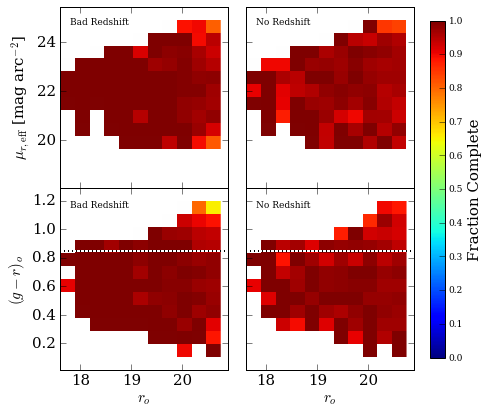

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)#,sharex=True,sharey=True)

bn=14
minN = 9
rlim = 16.75
lims = (r > rlim) & (gribase['SB_EXP_R'] > 18)& (gribase['SB_EXP_R'] < 26.25)

#SB BAD REDSHIFT
N, xedge, yedge = np.histogram2d(gribase['SB_EXP_R'][zgood&lims],r[zgood&lims], bins=bn)
N2,xx,yy = np.histogram2d(gribase['SB_EXP_R'][zbad],r[zbad],bins=(xedge, yedge))
m= (N+N2) < minN
frac = 1. - N2/N
frac[m]= np.nan
frac[0,0] =0
ax1.imshow(frac,interpolation='none',extent=[yedge[0], yedge[-1], xedge[-1], xedge[0]],aspect=0.48)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.set_ylim(xedge[0], xedge[-1])
ax1.get_xaxis().set_ticklabels([])


#SB No REDSHIFT

N, xedge, yedge = np.histogram2d(gribase['SB_EXP_R'][zgood&lims],r[zgood&lims], bins=bn)
N2,xx,yy = np.histogram2d(gribase['SB_EXP_R'][znot],r[znot],bins=(xedge, yedge))
m= (N+N2) < minN
frac = 1. - N2/N
frac[m]= np.nan
frac[0,0] =0
im = ax4.imshow(frac)   # MAKE LEGEND IMAGE
ax2.imshow(frac,interpolation='none',extent=[yedge[0], yedge[-1], xedge[-1], xedge[0]],aspect=0.48)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax2.set_ylim(xedge[0], xedge[-1])
ax2.get_xaxis().set_ticklabels([])
ax2.get_yaxis().set_ticklabels([])


#GR BAD REDSHIFT
lims = (r > rlim) & (gr > 0) & (gr < 1.3)
N, xedge, yedge = np.histogram2d(gr[zgood&lims],r[zgood&lims], bins=bn)
N2,xx,yy = np.histogram2d(gr[zbad],r[zbad],bins=(xedge, yedge))
m= (N+N2) < minN
frac = 1. - N2/N
frac[m]= np.nan
frac[0,0] =0
ax3.imshow(frac,interpolation='none',extent=[yedge[0], yedge[-1], xedge[-1], xedge[0]],aspect=2.8)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax3.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax3.set_ylim(xedge[0], xedge[-1])


#GR NO REDSHIFT

N, xedge, yedge = np.histogram2d(gr[zgood&lims],r[zgood&lims], bins=bn)
N2,xx,yy = np.histogram2d(gr[znot],r[znot],bins=(xedge, yedge))
m= (N+N2) < minN
frac = 1. - N2/N
frac[m]= np.nan
frac[0,0] =0
ax4.imshow(frac,interpolation='none',extent=[yedge[0], yedge[-1], xedge[-1], xedge[0]],aspect=2.8)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax4.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax4.set_ylim(xedge[0], xedge[-1])
ax4.get_yaxis().set_ticklabels([])


# LINE INDICATING GR CRITERIA
tgr=0.85    
ax3.axhline(tgr, c='w')
ax3.axhline(tgr, c='k', ls=':')
ax4.axhline(tgr, c='w')
ax4.axhline(tgr, c='k', ls=':')


ax1.set_xlim(17.6,20.9)
ax2.set_xlim(17.6,20.9)
ax3.set_xlim(17.6,20.9)
ax4.set_xlim(17.6,20.9)



# X/Y TITLES
ax1.set_ylabel('$\mu_{r, \mathrm{eff}}$ [mag arc$^{-2}$]')
ax3.set_ylabel('$(g-r)_o$')
#ax1.set_xlabel('r_o')
#ax2.set_xlabel('r_o')
ax3.set_xlabel('$r_o$')
ax4.set_xlabel('$r_o$')

ax1.text(17.8,24.75,'Bad Redshift',fontsize=9)
ax2.text(17.8,24.75,'No Redshift',fontsize=9)
ax3.text(17.8,1.15,'Bad Redshift',fontsize=9)
ax4.text(17.8,1.15,'No Redshift',fontsize=9)
# COLOR BAR
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.78])

fig.colorbar(im, cax=cbar_ax).set_label('Fraction Complete')
cbar_ax.tick_params(labelsize=9)


plt.tight_layout(w_pad=0,h_pad=0)
plt.gcf().subplots_adjust(right=0.9)
plt.savefig('fig_spec_complete2.png')
plt.savefig('fig_spec_complete2.pdf')

